### Nonsense Correlations #1
#### Christmas Trees Sales vs Births in US

Sources:
- [US Monthly Birth Data](https://www.kaggle.com/datasets/thedevastator/us-monthly-birth-data)
- [US Christmas Tree Sales Data](https://www.kaggle.com/datasets/thedevastator/us-christmas-tree-sales-data)

In [3]:
#Import libraries
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
#Import data
babies = pd.read_csv('Nonsense Correlations/Christmas Trees_Babies/allBirthData.csv',index_col='index')
trees = pd.read_csv('Nonsense Correlations/Christmas Trees_Babies/Week 40 - US Christmas Tree Sales - 2010 to 2016.csv',index_col='index')

In [5]:
#First lines
babies.head()

,Unnamed: 0,State,Month,Year,countyBirths,stateBirths,County
index,,,,,,,
0,1,1,1,1985,36.0,5027,1001.0
1,2,1,2,1985,36.0,4627,1001.0
2,3,1,3,1985,43.0,4738,1001.0
3,4,1,4,1985,40.0,4626,1001.0
4,5,1,5,1985,34.0,4834,1001.0


In [6]:
trees.head()

,Year,Type of tree,Number of trees sold,Average Tree Price,Sales
index,,,,,
0,2010,Real tree,27000000,36.12,975240000
1,2011,Real tree,30800000,34.87,1073996000
2,2012,Real tree,24500000,40.30,987350000
3,2013,Real tree,33020000,35.30,1165606000
4,2014,Real tree,26300000,39.50,1038850000


In [7]:
#The level of detail of babies dataset is the County, which means that the values for stateBirth are repeated over and over for each County
babies.sort_values(by=['State','Year','Month'])

,Unnamed: 0,State,Month,Year,countyBirths,stateBirths,County
index,,,,,,,
0,1,1,1,1985,36.0,5027,1001.0
12,13,1,1,1985,127.0,5027,1003.0
24,25,1,1,1985,31.0,5027,1005.0
36,37,1,1,1985,18.0,5027,1007.0
48,49,1,1,1985,40.0,5027,1009.0
...,...,...,...,...,...,...,...
318970,318971,56,8,2015,665.0,665,56999.0
319596,319597,56,9,2015,631.0,631,56999.0
320222,320223,56,10,2015,656.0,656,56999.0


In [8]:
#So, I can't use stateBirths column. Instead, I need to use countyBirths to sum

In [9]:
#Drop columns
babies.drop(columns=['Unnamed: 0','Month','stateBirths','County','State'],inplace=True)

In [10]:
#Drop columns
trees.drop(columns=['Type of tree'],inplace=True)

In [11]:
#Compare min and max years between the two datasets
print(f'Babies min year: {babies['Year'].min()}')
print(f'Babies max year: {babies['Year'].max()}')
print(f'Trees min year: {trees['Year'].min()}')
print(f'Trees max year: {trees['Year'].max()}')

Babies min year: 1985
Babies max year: 2015
Trees min year: 2010
Trees max year: 2016


In [12]:
#I'll do the correlation with the years from 2010 and 2015

babies.drop(babies.loc[babies['Year']<2010].index,inplace=True)

In [13]:
trees.drop(trees.loc[trees['Year']>2015].index,inplace=True)

Trees and babies dataset need to be grouped by Year

In [14]:
babies2 = babies.groupby(['Year']).sum()

In [15]:
babies2

,countyBirths
Year,
2010,3999386.0
2011,3953590.0
2012,3952841.0
2013,3932181.0
2014,3988076.0
2015,3978497.0


In [16]:
#Set the Year column as index in trees dataset
trees.set_index('Year',inplace=True)

In [17]:
trees2 = trees.groupby(['Year']).sum()

In [18]:
trees2

,Number of trees sold,Average Tree Price,Sales
Year,,,
2010,35200000,100.73,1505042000
2011,40300000,105.42,1744221000
2012,35400000,112.80,1777600000
2013,47720000,116.60,2360716000
2014,40200000,103.10,1922890000
2015,38400000,120.20,2183488000


#### Count the null values

In [19]:
babies2.isna().sum()

countyBirths    0
dtype: int64

In [20]:
trees.isna().sum()

Number of trees sold    0
Average Tree Price      0
Sales                   0
dtype: int64

#### Describe the datasets

In [21]:
babies2.describe().style.format('{:,.2f}')

,countyBirths
count,6.00
mean,"3,967,428.50"
std,"25,364.54"
min,"3,932,181.00"
25%,"3,953,028.25"
50%,"3,966,043.50"
75%,"3,985,681.25"
max,"3,999,386.00"


In [22]:
trees2.describe().style.format('{:,.2f}')

,Number of trees sold,Average Tree Price,Sales
count,6.00,6.00,6.00
mean,"39,536,666.67",109.81,"1,915,659,500.00"
std,"4,586,945.24",7.87,"312,063,451.84"
min,"35,200,000.00",100.73,"1,505,042,000.00"
25%,"36,150,000.00",103.68,"1,752,565,750.00"
50%,"39,300,000.00",109.11,"1,850,245,000.00"
75%,"40,275,000.00",115.65,"2,118,338,500.00"
max,"47,720,000.00",120.20,"2,360,716,000.00"


In [23]:
#Merge the datasets
merge = pd.concat([babies2,trees2],axis=1)

In [24]:
#Calculate the correlation matrix
correlation_matrix = merge.corr()

In [25]:
correlation_matrix.round(3)

,countyBirths,Number of trees sold,Average Tree Price,Sales
countyBirths,1.000,-0.647,-0.537,-0.538
Number of trees sold,-0.647,1.000,0.349,0.777
Average Tree Price,-0.537,0.349,1.000,0.800
Sales,-0.538,0.777,0.800,1.000


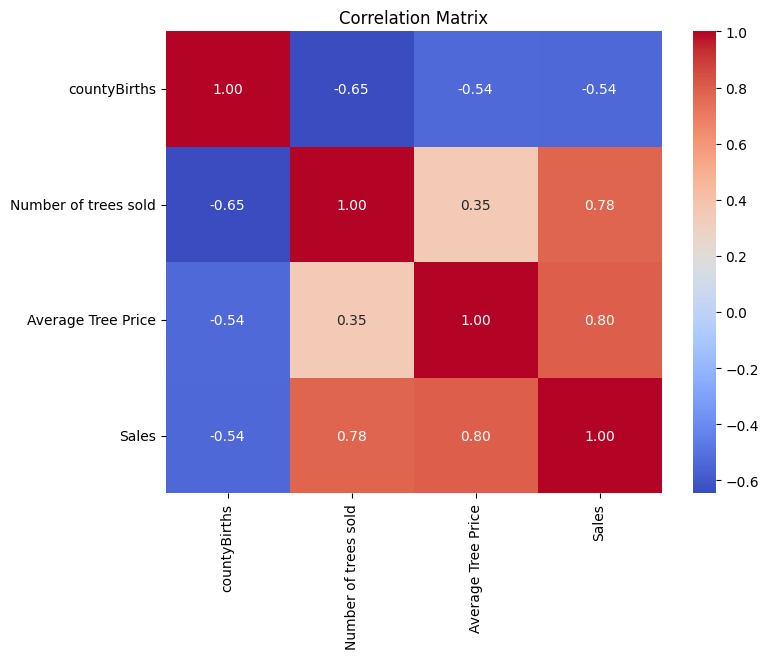

In [26]:
#Plot the correlation matrix
plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm',fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [27]:
#Need to recreate Year column
merge['Year'] = range(2010,2016)

In [28]:
merge

,countyBirths,Number of trees sold,Average Tree Price,Sales,Year
Year,,,,,
2010,3999386.0,35200000,100.73,1505042000,2010
2011,3953590.0,40300000,105.42,1744221000,2011
2012,3952841.0,35400000,112.80,1777600000,2012
2013,3932181.0,47720000,116.60,2360716000,2013
2014,3988076.0,40200000,103.10,1922890000,2014
2015,3978497.0,38400000,120.20,2183488000,2015


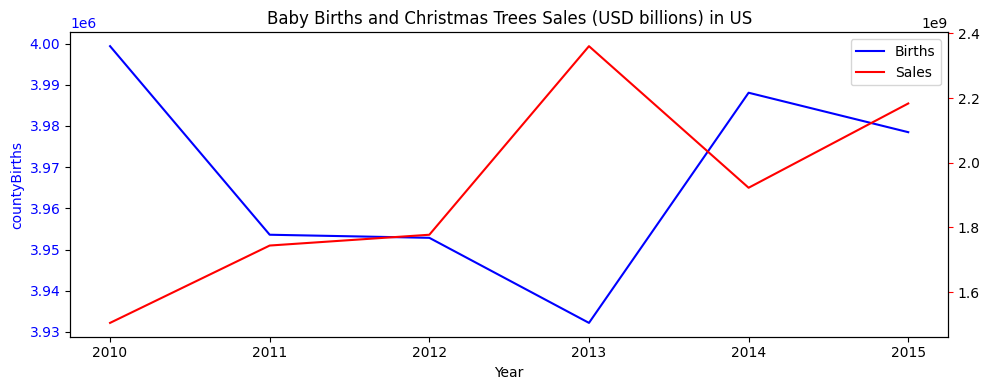

In [33]:
# Creating the plot: Sales vs Babies Born
fig, ax1 = plt.subplots(figsize=(10,4))

# Plotting 'countyBirths' on the first Y-axis
ax1.set_xlabel('Year')
ax1.set_ylabel('countyBirths',color='blue')
line1, = ax1.plot(merge['Year'],merge['countyBirths'],color='blue',label='Births')
ax1.tick_params(axis='y',labelcolor='blue')

# Creating a second Y-axis for 'Sales'
ax2 = ax1.twinx()
ax2.set_xlabel('Sales',color='red')
line2, = ax2.plot(merge['Year'],merge['Sales'],color='red',label='Sales')
ax2.tick_params(axis='y',color='red')

# Adding the legend
lines = [line1, line2]
ax1.legend(lines, [l.get_label() for l in lines])

#Title and layout
plt.title('Baby Births and Christmas Trees Sales (USD billions) in US')
fig.tight_layout()
plt.show()

As you can see in the chart, from 2010 to 2011, when the number of births fell, the Sales of Christmas Trees rose. 

A similar effect happened from 2012 to 2013 and in reverse from 2013 to 2014.


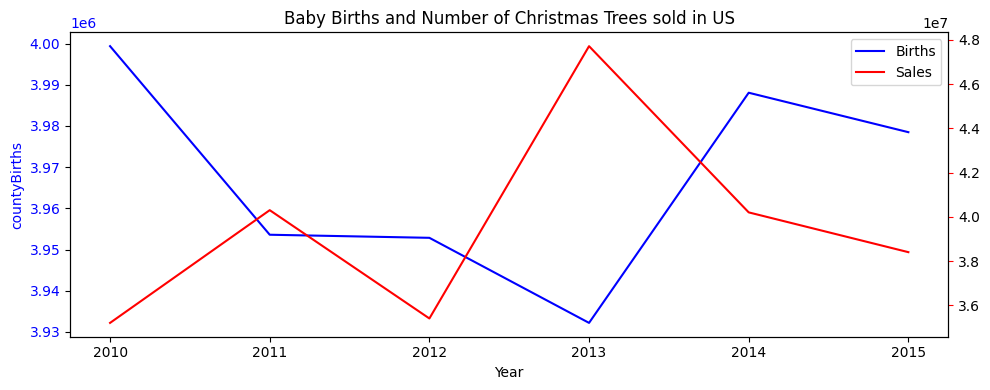

In [37]:
# Creating the plot: Number of Trees Sold vs Babies Born
fig, ax1 = plt.subplots(figsize=(10,4))

# Plotting 'countyBirths' on the first Y-axis
ax1.set_xlabel('Year')
ax1.set_ylabel('countyBirths',color='blue')
line1, = ax1.plot(merge['Year'],merge['countyBirths'],color='blue',label='Births')
ax1.tick_params(axis='y',labelcolor='blue')

# Creating a second Y-axis for 'Sales'
ax2 = ax1.twinx()
ax2.set_xlabel('# of Trees',color='red')
line2, = ax2.plot(merge['Year'],merge['Number of trees sold'],color='red',label='Sales')
ax2.tick_params(axis='y',color='red')

# Adding the legend
lines = [line1, line2]
ax1.legend(lines, [l.get_label() for l in lines])

#Title and layout
plt.title('Baby Births and Number of Christmas Trees sold in US')
fig.tight_layout()
plt.show()

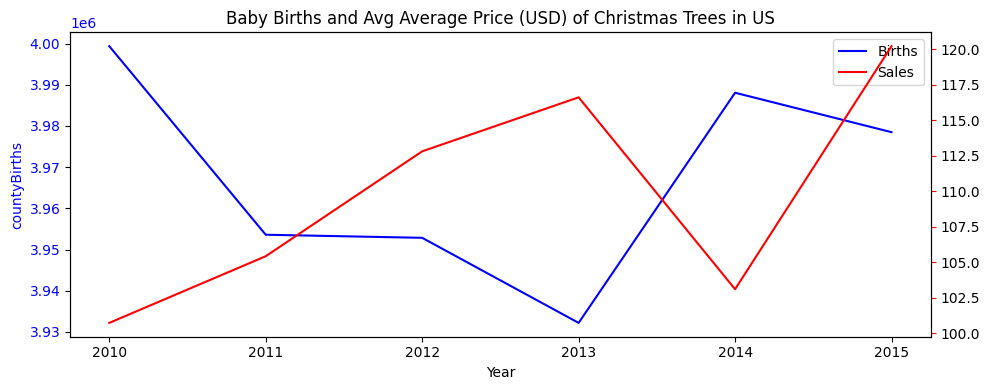

In [38]:
# Creating the plot: Average Tree Price vs Babies Born
fig, ax1 = plt.subplots(figsize=(10,4))

# Plotting 'countyBirths' on the first Y-axis
ax1.set_xlabel('Year')
ax1.set_ylabel('countyBirths',color='blue')
line1, = ax1.plot(merge['Year'],merge['countyBirths'],color='blue',label='Births')
ax1.tick_params(axis='y',labelcolor='blue')

# Creating a second Y-axis for 'Sales'
ax2 = ax1.twinx()
ax2.set_xlabel('# of Trees',color='red')
line2, = ax2.plot(merge['Year'],merge['Average Tree Price'],color='red',label='Sales')
ax2.tick_params(axis='y',color='red')

# Adding the legend
lines = [line1, line2]
ax1.legend(lines, [l.get_label() for l in lines])

#Title and layout
plt.title('Baby Births and Avg Average Price (USD) of Christmas Trees in US')
fig.tight_layout()
plt.show()

#### Conclusion

The number of babies born have a **strong negative** correlation with the Christmas trees sales variables
- That is: when more babies are born, less trees are sold (and vice-versa)

However, while there is a strong negative correlation between the number of trees sold and county births, the correlation with average tree price is weak. 


This indicates that the number of trees sold does not have a strong linear relationship with the average tree price.

So, maybe if you want to have kids 👶 in US, you shouldn't buy Christmas Trees 🎄 (just kidding). 